In [45]:
import os
# os.chdir("./309 workspace")
print(os.getcwd())

from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import dirtools as dt

/home/jupyter/309 workspace


['untitled.wav', 'Read_wav.ipynb', 'sound_card_calibration.csv', 'calibrate_soundcard.ipynb', 'dirtools.py', '19.5mv.wav']
conversion constant: 106.373 +/- 2.126 millivolts
[0.16464233 0.18579102 0.22988892 0.29571533 0.32876587 0.46499634]
[19.5  21.7  26.65 33.65 37.2  51.5 ]


Text(0.5, 1.0, 'Calibration Curve for Sound Card')

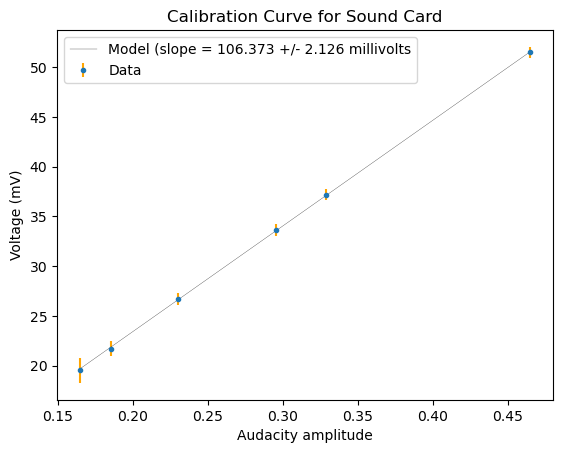

In [98]:
# columns
# 1: amplitude in dimensionless quantity (-1 to 1)
# 2: measured amplitude in voltage via cursors on scope
# 3: voltage uncertainty

print(dt.get_files("."))
data_file = "sound_card_calibration.csv"

dat = np.loadtxt(data_file,delimiter="," ,encoding='utf-8-sig')
aud = dat[:, 0]
v = dat[:, 1]
delta_v = dat[:, 2]
def linear(x, A, B):
    # A in units of volts
    return A * x + B

params, ncov = curve_fit(linear, aud, v, sigma=delta_v, p0=[1, 0.1])

print("conversion constant: {:.3f} +/- {:.3f} millivolts".format(*params))
fig, ax = plt.subplots()
ax.errorbar(aud, v, delta_v, fmt=".", ecolor="orange", label="Data")
ax.plot(aud, linear(aud, *params), label="Model (slope = {:.3f} +/- {:.3f} millivolts".format(*params), color="k", linewidth=0.2)
ax.legend()
ax.set_xlabel("Audacity amplitude")
ax.set_ylabel("Voltage (mV)")
ax.set_title("Calibration Curve for Sound Card")